<a href="https://colab.research.google.com/github/alexandrufrunza/Sisteme-integrate/blob/main/Curs_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Elemente de inteligență artificială. Machine Learning.

## Obiective

1.   Introducere
2.   Machine Learning
3.   Introducere în Pytorch
4.   Regresia liniara





# Introducere
## Conext

**Inteligența arficială** reprezintă domeniul informaticii care dezvoltă sisteme capabile să realizeze sarcini ce, în mod tradițional, necesită inteligență umană. AI include atât metode bazate pe reguli programate explicit, cât și metode care învață automat din date.

**Machine Learning (ML)** este o ramură a AI care permite sistemelor să învețe tipare din date și să realizeze predicții sau decizii fără a fi programate explicit pentru fiecare situație. Modelele sunt antrenate folosind algoritmi care optimizează performanța pe baza datelor.

**Deep Learning** este o subramură a ML care folosește rețele neuronale artificiale cu multe straturi pentru a învăța reprezentări ierarhice ale datelor. DL permite atingerea unor performanțe superioare în sarcini precum analiza imaginilor, procesarea limbajului natural sau recunoașterea vorbirii. (https://www.deeplearningbook.org/).



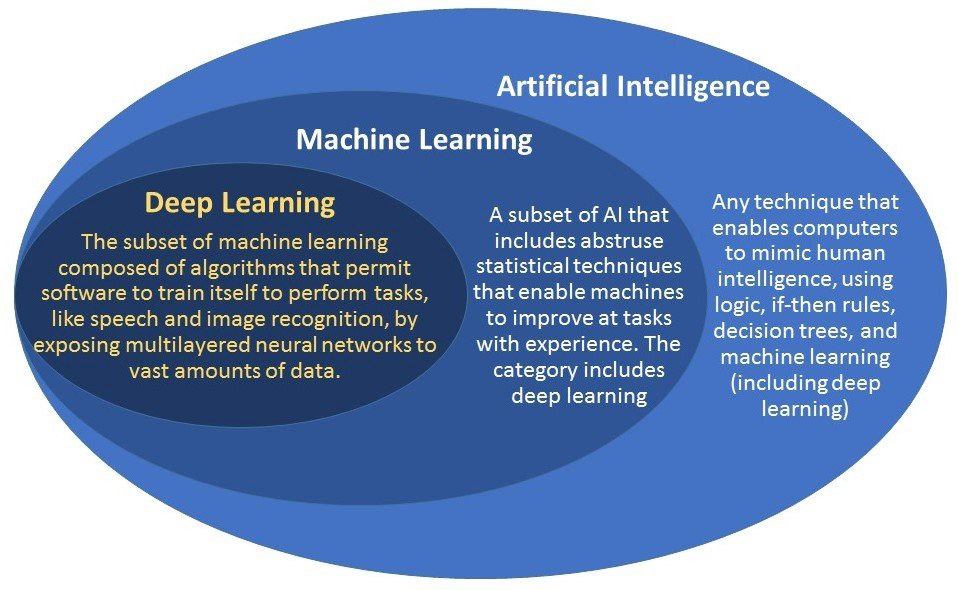

# Machine Learning

ML_simple.svg

## Tipuri de învățare

* Învățare supervizată: datele sunt etichetate (input,true_output)
* Învățare nesupervizată: datele nu sunt etichetate (input)

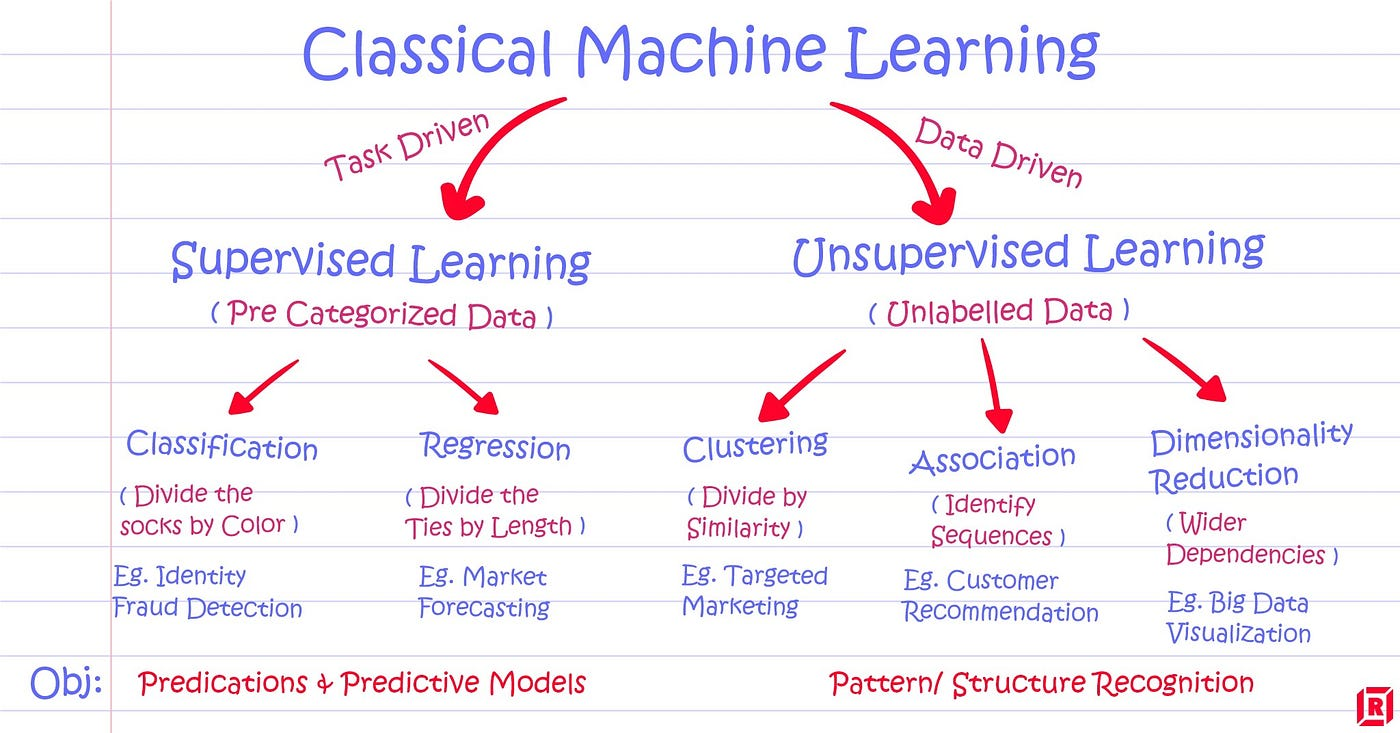

## Workflow
ML2.svg

## Optimizarea modelului și actualizarea parametrilor

Antrenarea unui model ML/DL presupune ajustarea parametrilor săi astfel încât funcția de pierdere (loss) să fie minimizată. Acest proces se bazează pe algoritmi de optimizare derivați din gradient descent, care reprezintă fundamentul majorității optimizatorilor moderni.

Gradient descent actualizează parametrii în direcția opusă gradientului funcției de cost:

$w_{k+1} = w_{k} - lr \nabla L(w_{k})$

unde:
* lr este *learning rate* (pasul de actualizare)
* $\nabla L(w_{k})$ este gradientul funcției de pierdere în punctul curent

#### Variantele principale ale Gradient Descent

*   Batch Gradient Descent: calculează gradientul folosind întregul set de date. Stabil, dar lent și costisitor.
*   Stochastic Gradient Descent: actualizează parametrii pe baza unui singur eșantion. Rapid, dar zgomotos.
*   Mini-batch Gradient Descent: folosește mici submulțimi (batch-uri). Este cel mai folosit în practică deoarece oferă un echilibru între stabilitate și performanță.

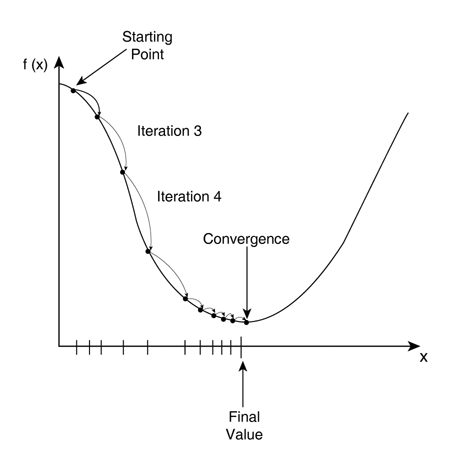





PyTorch (https://pytorch.org/) este un framework open-source pentru Machine Learning și Deep Learning, dezvoltat inițial de Facebook/Meta AI și integrat complet în ecosistemul Python. Este foarte popular în cercetare datorită sintaxei sale naturale (pythonic) și flexibilității în definirea modelelor.

Principalele trei caracteristici ale PyTorch sunt:
1. Calculul cu tensori
Similar cu NumPy, dar cu suport nativ pentru paralelizare pe GPU (CUDA) și utilizarea eficientă a hardware-ului modern. (https://www.youtube.com/watch?v=8_ZTvG1WQxM)

2. Autograd – derivare automată (https://pytorch.org/blog/overview-of-pytorch-autograd-engine/)
PyTorch construiește automat graful de calcul și poate calcula gradientul necesar învățării prin backpropagation, ceea ce elimină nevoia derivărilor manuale.

3. Optimizări în PyTorch 2.x – torch.compile (https://pytorch.org/get-started/pytorch-2-x/)
PyTorch 2.x introduce un compilator JIT (Just-In-Time) care optimizează automat modelele pentru performanță, fără modificări ale codului.


## Instalare

* Pagina oficială Get Started (PyTorch 2.x) care generează comanda corectă pentru pip, inclusiv cu suport GPU (CUDA) (https://pytorch.org/get-started/)


# Alte framework-uri pentru Deep Learning în Python


*   TensorFlow (https://www.tensorflow.org/)
Framework dezvoltat de Google, foarte utilizat în industrie și producție. Include suport pentru GPU/TPU și o suită de instrumente pentru deployment și scalare.

*   Keras (https://keras.io/)
API de nivel înalt pentru dezvoltarea rapidă a modelelor de Deep Learning. În prezent este integrat în TensorFlow (tf.keras), dar poate funcționa și cu PyTorch sau JAX în versiunile moderne.


# Tensori

Un tensor este o structură de date multidimensională, o generalizare a vectorilor (1D) și matricilor (2D) către dimensiuni mai mari. În PyTorch, toate datele folosite în modele (intrări, ieșiri, parametri, gradienti) sunt reprezentate sub formă de tensori.

PyTorch oferă operații similare cu NumPy, dar cu suport suplimentar pentru GPU.

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

first_tensor = torch.tensor([12, 5, -2])
second_tensor = torch.tensor([[-3, 4], [5, 6]])
third_tensor = torch.tensor([ [[1, 2], [2, 3]], [[4, 5], [5, 6]]])

print(first_tensor, second_tensor, third_tensor, sep='\n')

print(first_tensor.shape, second_tensor.shape, third_tensor.shape, sep="\n")


tensor([12,  5, -2])
tensor([[-3,  4],
        [ 5,  6]])
tensor([[[1, 2],
         [2, 3]],

        [[4, 5],
         [5, 6]]])
torch.Size([3])
torch.Size([2, 2])
torch.Size([2, 2, 2])


## Utilizarea procesorului grafic

In [ ]:
if torch.cuda.is_available():
    print("Număr GPU:", torch.cuda.device_count())
    print("Nume GPU:", torch.cuda.get_device_name(0))
    cuda0 = torch.device('cuda:0')

    first_cuda = torch.tensor([-4, 5, 7], device=cuda0)
    second_cuda = torch.tensor([-2, 6, 7], device=cuda0)

    sum_cuda = first_cuda + second_cuda
    print("Rezultat pe GPU:", sum_cuda, "| device:", sum_cuda.device)

    sum_cpu = sum_cuda.cpu()
    print("Rezultat pe CPU:", sum_cpu, "| device:", sum_cpu.device)

else:
    print("CUDA nu este disponibil pe acest sistem.")


Număr GPU: 1
Nume GPU: Tesla T4
Rezultat pe GPU: tensor([-6, 11, 14], device='cuda:0') | device: cuda:0
Rezultat pe CPU: tensor([-6, 11, 14]) | device: cpu


# Derivatele în Pytorch (https://www.youtube.com/watch?v=MswxJw-8PvE)

**Autograd** construiește automat un graf al operațiilor atunci când un tensor are requires_grad=True. Fiecare operație (ex. înmulțirea) devine un nod din graf, iar atunci când apelăm backward(), PyTorch parcurge graful invers, aplicând regulile de derivare pentru fiecare nod (MulBackward, etc.). Gradientul este propagat înapoi până la tensori-leaf (cei creați de utilizator), unde este acumulat în câmpul .grad. Tensorii fără requires_grad=True nu acumulează gradient.

### Derivate în funcție de o singură variabilă

In [ ]:
x = torch.tensor(2., requires_grad=True)
print("Tensorul x: ", x)

y = x**3 + 2*x
print("Tensorul y:", y)

y.backward()
print(x.grad.data)
print("Derivata functiei y în raport cu variabila x: ", x.grad)

Tensorul x:  tensor(2., requires_grad=True)
Tensorul y: tensor(12., grad_fn=<AddBackward0>)
tensor(14.)
Derivata functiei y în raport cu variabila x:  tensor(14.)


### Derivate parțiale

In [ ]:
u = torch.tensor(3., requires_grad=True)
v = torch.tensor(2., requires_grad=True)

f = v**2 + u**3 - u*v
print("Valoarea funcției f: ", f)

f.backward()
print("Derivata parțială a funcției f în raport cu variabila u: ", u.grad)
print("Derivata parțială a funcției f în raport cu variabila v: ", v.grad)

Valoarea funcției f:  tensor(25., grad_fn=<SubBackward0>)
Derivata parțială a funcției f în raport cu variabila u:  tensor(25.)
Derivata parțială a funcției f în raport cu variabila v:  tensor(1.)


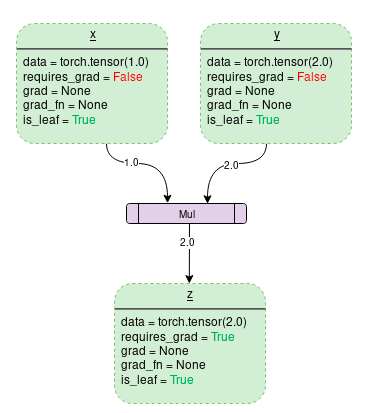
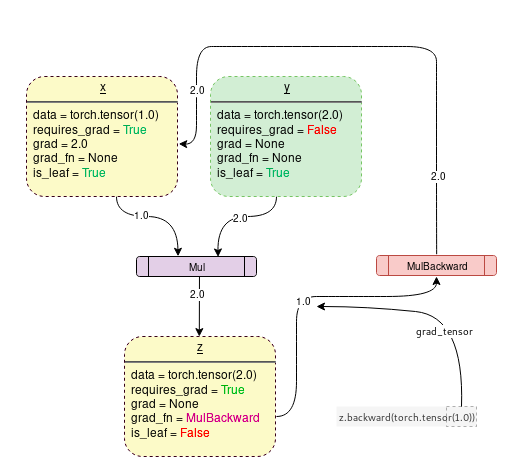

In [ ]:
print("=== Tensorul x ===")
print("valoare:", x)                       # valoarea efectivă a tensorului
print("grad_fn:", x.grad_fn)               # None -> x NU este rezultat al unei operații
print("grad:", x.grad)                     # gradientul acumulat
print("is_leaf:", x.is_leaf)               # True -> x este tensor leaf
print("requires_grad:", x.requires_grad)   # PyTorch va urmări operațiile asupra lui

print("\n=== Tensorul y ===")
print("valoare:", y)                       # y este obținut prin operații pe x
print("grad_fn:", y.grad_fn)               # arată funcția care a generat y (ex: PowBackward0)
print("grad:", y.grad)                     # y este scalar (dacă da), deci gradientul lui nu se stochează
print("is_leaf:", y.is_leaf)               # False -> y NU este leaf
print("requires_grad:", y.requires_grad)   # True -> y participă la graful de calcul


=== Tensorul x ===
valoare: tensor(2., requires_grad=True)
grad_fn: None
grad: tensor(14.)
is_leaf: True
requires_grad: True

=== Tensorul y ===
valoare: tensor(12., grad_fn=<AddBackward0>)
grad_fn: <AddBackward0 object at 0x7b27d904fb50>
grad: None
is_leaf: False
requires_grad: True


/tmp/ipython-input-2619625470.py:11: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more information. (Triggered internally at /pytorch/build/aten/src/ATen/core/TensorBody.h:489.)
  print("grad:", y.grad)                     # y este scalar (dacă da), deci gradientul lui nu se stochează


### Derivate în raport cu variabile multidimensionale

x = tensor([-10.0000,  -3.3333,   3.3333,  10.0000], requires_grad=True)
Gradient = tensor([-20.0000,  -6.6667,   6.6667,  20.0000])


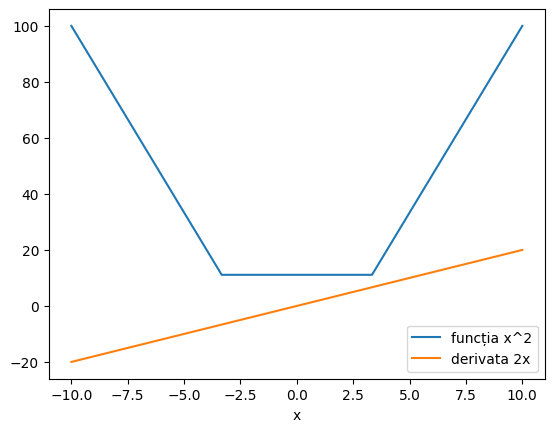

In [ ]:
x = torch.linspace(-10, 10, 4, requires_grad=True)
Y = x ** 2
y = torch.sum(x ** 2)

# Calcul gradient
y.backward()

print("x =", x)
print("Gradient =", x.grad)

# Plot funcție și derivată
plt.plot(x.detach(), Y.detach(), label='funcția x^2')
plt.plot(x.detach(), x.grad.detach(), label='derivata 2x')
plt.xlabel('x')
plt.legend()
plt.show()

### Acumularea gradientului

In [ ]:
x = torch.tensor(2.0, requires_grad=True)

# prima trecere
y = x**2        # derivata la 2 este 2*x = 4
y.backward()
print("După primul backward, grad =", x.grad)

# a doua trecere
y = x**2        # aceeași funcție, același gradient
y.backward()
print("După al doilea backward, grad =", x.grad)

# resetare gradient
x.grad.zero_()
print("După zero_grad, grad =", x.grad)


După primul backward, grad = tensor(4.)
După al doilea backward, grad = tensor(8.)
După zero_grad, grad = tensor(0.)


## Regresia liniară. Definiție. Antrenare.

Antrenarea unei rețele neuronale (sau a unui model de regresie liniară) presupune, în esență, următorii pași:

1. **Definirea arhitecturii modelului**  
   Alegem forma modelului (de exemplu, o rețea cu un singur strat liniar pentru regresie: `y = wx + b`).

2. **Propagarea înainte (forward)**  
   Datele de intrare sunt propagate de la stânga la dreapta prin model pentru a obține predicțiile.

3. **Calculul funcției de cost (funcția de pierdere, loss)**  
   Comparăm predicțiile modelului cu valorile reale și calculăm eroarea (de exemplu, MSE pentru regresie).

4. **Propagarea înapoi (backward)**  
   Aplicăm backpropagation: se calculează derivatele (gradientul funcției de cost) față de parametrii modelului.

5. **Actualizarea parametrilor**  
   Parametrii (de exemplu `w` și `b`) sunt actualizați folosind un algoritm de optimizare (gradient descent, SGD, Adam etc.) și un anumit *learning rate*.

Acești pași se repetă de obicei pentru mai multe epoci (epoch-uri), până când modelul converge sau atinge o performanță satisfăcătoare.



### Definirea arhitecturii și propagarea în direcția forward

#### Varianta 1 - definirea manuală a arhitecturii

In [ ]:
# Ecuația unei drepte: y = w*x + b
# Parametrii modelului (cu gradient)
w = torch.tensor(2., requires_grad=True)
b = torch.tensor(1., requires_grad=True)

# Funcția forward (predicția modelului)
def forward(x):
    return w*x + b

# Predicție pentru o singură valoare
x1 = torch.tensor([[3.0]])
yhat1 = forward(x1)
print("Predicția pentru x1:", yhat1)

# Predicție pentru un vector de valori
x2 = torch.tensor([[1.], [4.], [6.]])
yhat2 = forward(x2)
print("Predicțiile pentru x2:", yhat2)
print("Forma x2:", x2.shape)


Predicția pentru x1: tensor([[7.]], grad_fn=<AddBackward0>)
Predicțiile pentru x2: tensor([[ 3.],
        [ 9.],
        [13.]], grad_fn=<AddBackward0>)
Forma x2: torch.Size([3, 1])


#### Varianta 2 - folosirea clasei Linear

In [ ]:
from torch.nn import Linear
import torch

torch.manual_seed(100)

LR = Linear(in_features=1, out_features=1, bias=True)
print("Parametrii w și b:", list(LR.parameters()))

print("\nState dict:", LR.state_dict())
print("\nWeight și bias:")
print(LR.weight)
print(LR.bias)

x3 = torch.tensor([[3.0]])
yhat3 = LR(x3)

x4 = torch.tensor([[2.4],[4.0]])
yhat4 = LR(x4)

print("\nPredicții:")
print(yhat3)
print(yhat4)

print("Forma lui x4:", x4.shape)
print("Forma predicțiilor:", yhat4.shape)


Parametrii w și b: [Parameter containing:
tensor([[-0.7767]], requires_grad=True), Parameter containing:
tensor([0.6317], requires_grad=True)]

State dict: OrderedDict({'weight': tensor([[-0.7767]]), 'bias': tensor([0.6317])})

Weight și bias:
Parameter containing:
tensor([[-0.7767]], requires_grad=True)
Parameter containing:
tensor([0.6317], requires_grad=True)

Predicții:
tensor([[-1.6983]], grad_fn=<AddmmBackward0>)
tensor([[-1.2323],
        [-2.4750]], grad_fn=<AddmmBackward0>)
Forma lui x4: torch.Size([2, 1])
Forma predicțiilor: torch.Size([2, 1])


#### Varianta 3 - construcția de modele particulare

In [ ]:
from torch import nn

class LR_custom(nn.Module):

    def __init__(self, input_size, output_size):
        super(LR_custom, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)

# Crearea modelului
lr_custom = LR_custom(1, 1)

print("The parameters:")
print(list(lr_custom.parameters()))

print("\nLinear model inside:")
print(lr_custom.linear)

x_lr = torch.tensor([[5.0],[3.0]])
yhat = lr_custom(x_lr)

print("\nThe prediction:")
print(yhat)

print("\nPython dictionary (state_dict):")
print(lr_custom.state_dict())


The parameters:
[Parameter containing:
tensor([[-0.4749]], requires_grad=True), Parameter containing:
tensor([-0.0322], requires_grad=True)]

Linear model inside:
Linear(in_features=1, out_features=1, bias=True)

The prediction:
tensor([[-2.4066],
        [-1.4569]], grad_fn=<AddmmBackward0>)

Python dictionary (state_dict):
OrderedDict({'linear.weight': tensor([[-0.4749]]), 'linear.bias': tensor([-0.0322])})


### Calculul funcției cost, erorii
Funcția cost (sau funcția de pierdere, loss function) este o funcție care măsoară performanța unui model de Machine Learning / Deep Learning.
Ea cuantifică diferența dintre valorile estimate de model și valorile reale și o exprimă sub forma unui singur scalar real (de obicei nenegativ).

În mod obișnuit:
* Funcția de cost este minimizată.
Un cost mai mic înseamnă un model mai bun.
Exemplu: **eroarea medie pătratică** (MSE): $\text{MSE} = \frac{1}{N}\sum_i (y_i - \hat{y_i})^2$

În unele contexte (de exemplu, în învățarea prin întărire – Reinforcement Learning), în loc de funcție de cost se definește o funcție de recompensă sau funcție de utilitate, care este:
* maximizată (vrem recompensă cât mai mare),
dar aici nu mai vorbim de „funcție cost”, ci de o funcție de recompensă.

In [ ]:
# Predicție și etichete
yhat = torch.tensor([[2.5], [6.0]])
y    = torch.tensor([[3.0], [5.0]])

# Funcția de pierdere PyTorch
criterion = nn.MSELoss()

loss = criterion(yhat, y)
print("Loss =", loss.item())


Loss = 0.625


## Antrenarea modelului (propagare backward si actualizare a parametrilor)

### Class helper pentru reprezentare grafică

In [ ]:
# Clasa pentru afișare
class plot_diagram():
    # Constructor
    def __init__(self, X, Y, w, stop, go = False):
        start = w.data
        self.error = []
        self.parameter = []
        self.X = X.numpy()
        self.Y = Y.numpy()
        self.parameter_values = torch.arange(start, stop)
        self.Loss_function = [criterion(forward(X), Y).item() for w.data in self.parameter_values]
        w.data = start

    # Executor
    def __call__(self, Yhat, w, error, n):
        self.error.append(error)
        self.parameter.append(w.data)
        plt.subplot(212)
        plt.plot(self.X, Yhat.detach().numpy())
        plt.plot(self.X, self.Y,'ro')
        plt.xlabel("A")
        plt.ylim(-20, 20)
        plt.subplot(211)
        plt.title("Data Space (top) Estimated Line (bottom) Iteration " + str(n))
        plt.plot(self.parameter_values.numpy(), self.Loss_function)
        plt.plot(self.parameter, self.error, 'ro')
        plt.xlabel("B")
        plt.figure()

    # Destructor
    def __del__(self):
        plt.close('all')



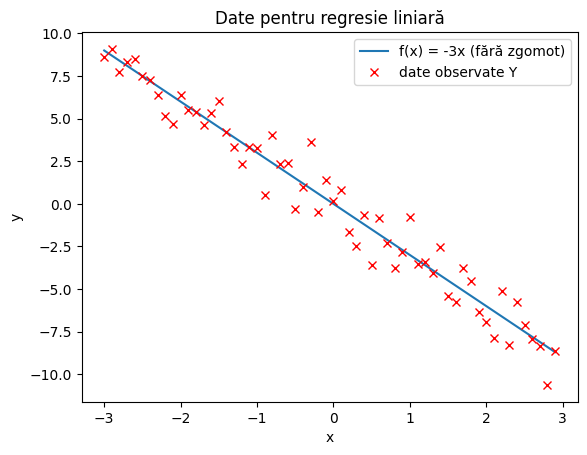

Epoca 5: loss = 1.2998, w = -3.0674


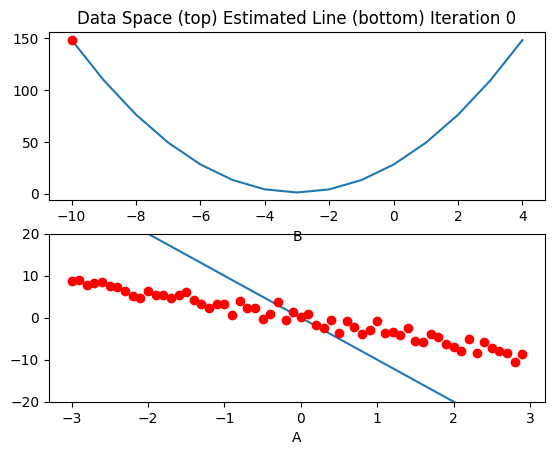

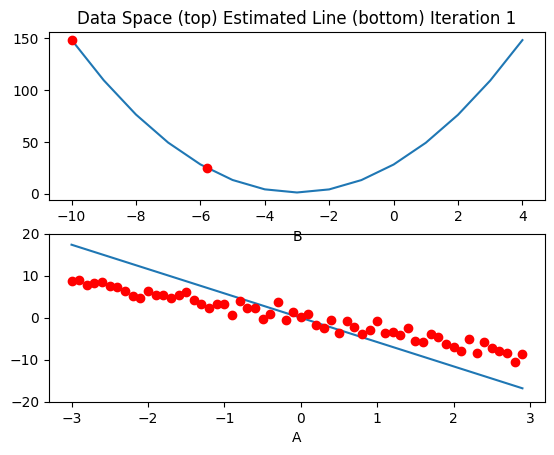

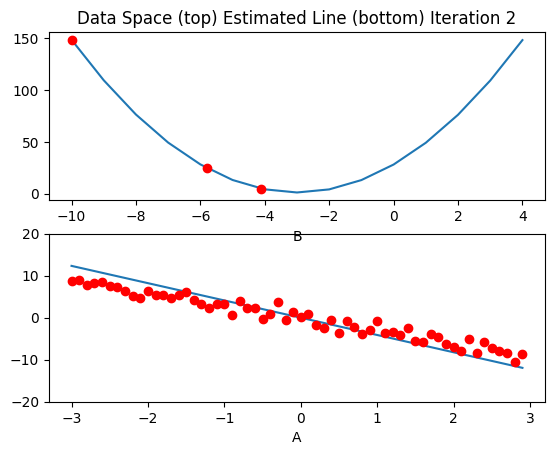

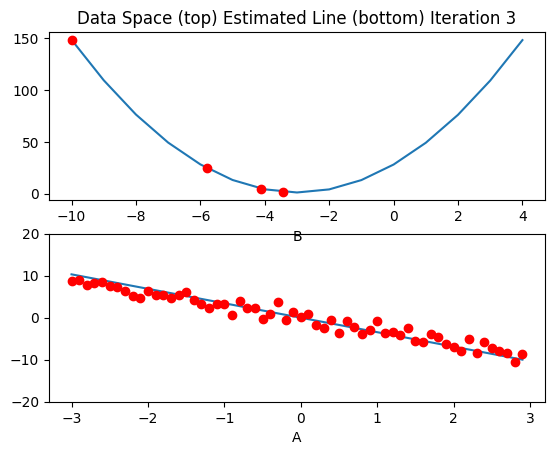

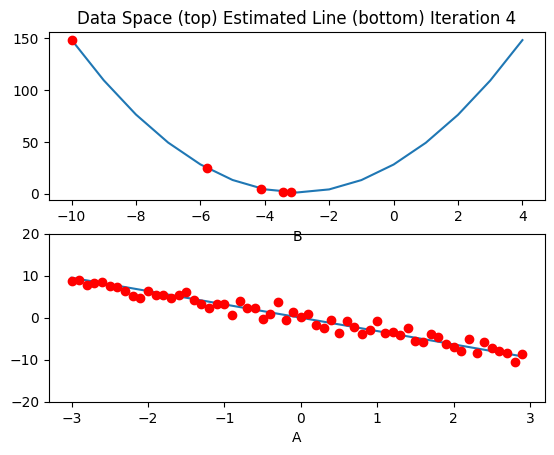

<Figure size 640x480 with 0 Axes>

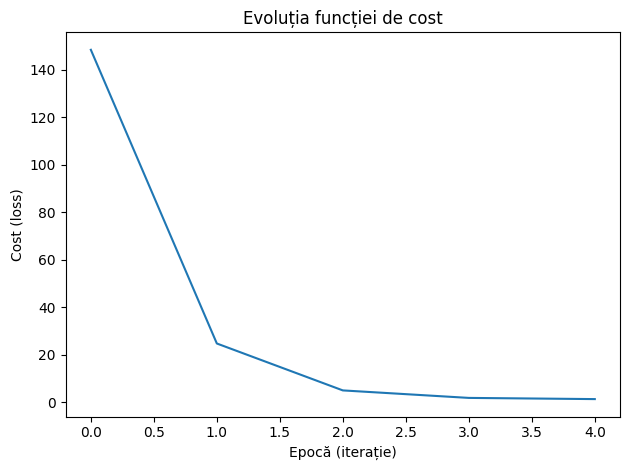

Valoarea finală a lui w: -3.06736421585083


In [ ]:
# =========================
# 1. Datele: X și Y (liniar + zgomot)
# =========================

# X: puncte între -3 și 3 (coloană 2D: N x 1)
X = torch.arange(-3, 3, 0.1).view(-1, 1)

# f(x) = -3x (linia "adevărată")
f_true = -3 * X

# Y: valori observate = f(x) + zgomot
Y = f_true + torch.randn(X.size())

# Vizualizare: dreapta ideală și punctele cu zgomot
plt.figure()
plt.plot(X.numpy(), f_true.numpy(), label='f(x) = -3x (fără zgomot)')
plt.plot(X.numpy(), Y.numpy(), 'rx', label='date observate Y')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Date pentru regresie liniară')
plt.show()

# =========================
# 2. Modelul: y = w * x
# =========================

# Parametrul modelului (panta w), inițial ales departe de valoarea reală (-3)
w = torch.tensor(-10.0, requires_grad=True)

# Definim predicția modelului
def forward(x):
    """
    Model liniar simplu: y_hat = w * x
    (nu folosim bias aici, doar panta)
    """
    return w * x

# =========================
# 3. Funcția de cost și optimizer-ul
# =========================

learning_rate = 0.1
loss_history = []

criterion = nn.MSELoss()                 # eroare medie pătratică

# opțional: funcție de vizualizare a evoluției în plan (definită anterior)
gradient_plot = plot_diagram(X, Y, w, stop=5)

# =========================
# 4. Bucla de antrenare (training loop)
# =========================

def train_model(num_epochs: int):
    for epoch in range(num_epochs):
        # 1. Forward: predicția modelului pentru toate punctele X
        Y_hat = forward(X)

        # 2. Calculul erorii (loss)
        loss = criterion(Y_hat, Y)

        # 3. Vizualizare (dacă ai definit plot_diagram)
        gradient_plot(Y_hat, w, loss.item(), epoch)

        # 4. Salvăm valoarea erorii pentru analiză
        loss_history.append(loss.item())

        # 5. Backward: calculul gradientului d(loss)/dw
        loss.backward()

        # 6. Actualizarea parametrilor
        w.data = w.data - learning_rate * w.grad.data

        # 7. Resetăm gradientul vechi
        w.grad.data.zero_()

        # (opțional) afisăm progresul
        if (epoch + 1) % 5 == 0:
            print(f"Epoca {epoch+1}: loss = {loss.item():.4f}, w = {w.item():.4f}")

# Rulăm antrenarea
train_model(num_epochs=5)

# =========================
# 5. Evoluția erorii în timp
# =========================

plt.figure()
plt.plot(loss_history)
plt.xlabel("Epocă (iterație)")
plt.ylabel("Cost (loss)")
plt.title("Evoluția funcției de cost")
plt.tight_layout()
plt.show()

print("Valoarea finală a lui w:", w.item())
